In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
df = pd.read_csv('../../../Data/ETH-USD.csv', usecols=['Date', 'Close'])
df['Date'] = pd.to_datetime(df['Date'])
df['MonthYear'] = df['Date'].dt.year.astype(str) +'-'+df['Date'].dt.month.astype(str)
df['MonthYear'] = df['MonthYear'].drop_duplicates()
df.dropna()
df.reset_index(drop=True)
df

,Date,Close,MonthYear
0,2017-11-09,320.884003,2017-11
1,2017-11-10,299.252991,NaN
2,2017-11-11,314.681000,NaN
3,2017-11-12,307.907990,NaN
4,2017-11-13,316.716003,NaN
...,...,...,...
1994,2023-04-26,1866.564209,NaN
1995,2023-04-27,1908.786377,NaN
1996,2023-04-28,1892.512817,NaN
1997,2023-04-29,1908.916992,NaN


In [21]:
# Train test val split in 8-1-1 set
test_size = int(len(df)*0.10)
val_size = int(len(df)*0.10)
train_size = int(len(df)-test_size-val_size)

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [22]:
# Fitting
es = ExponentialSmoothing(train_data['Close'], trend='mul', seasonal=None)
model = es.fit()

In [23]:
# Making predictions
y_test_pred = model.predict(start=test_data.index[0], end=test_data.index[-1])
y_val_pred = model.predict(start=val_data.index[0], end=val_data.index[-1])


In [24]:
# RMSE 
rmse = mean_squared_error(test_data['Close'], y_test_pred, squared=False)
print("The root mean squared error (RMSE) on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(val_data['Close'], y_val_pred, squared=False)
print("The root mean squared error (RMSE) on validation set: {:.3f}".format(rmse))

The mean squared error (MSE) on test set: 3136.632
The mean squared error (MSE) on validation set: 7378.582


In [25]:
# Predicting next 30 days' prices
last_index = df.index[-1]
X_30 = pd.RangeIndex(start=last_index+1, stop=last_index+30, step=1)
X_30

RangeIndex(start=1999, stop=2029, step=1)

In [26]:
y_30_pred = model.predict(start=X_30[0], end=X_30[-1])

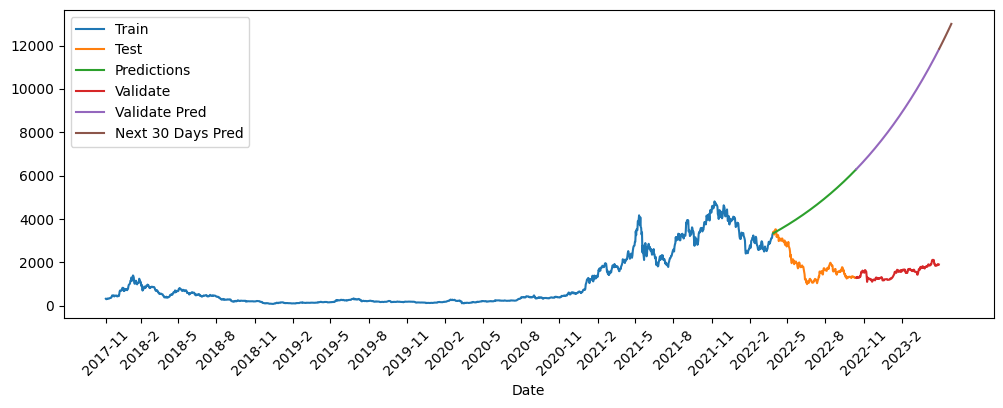

In [27]:
plt.subplots(figsize=(12, 4))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_test_pred)
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_val_pred)
plt.plot(X_30, y_30_pred)
plt.legend(['Train', 'Test', 'Predictions', 'Validate',
           'Validate Pred', 'Next 30 Days Pred'])

temp = df.dropna(subset=['MonthYear'])
temp = temp['MonthYear'].loc[::3]
plt.xticks(temp.index, temp, rotation=45)

plt.xlabel('Date')
plt.show()
